**Import Necessary Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Importing the CSV file**

In [4]:
dataset=pd.read_csv("/content/train.csv")

**Viewing Data For Data Preprocessing**

In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Preprocessing and Cleaning**

In [10]:
dataset.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [11]:
print(dataset.loc[(dataset.Survived==1 ) & (dataset.Sex=='male')]['Survived'].count())
print(dataset.loc[(dataset.Survived==1) & (dataset.Sex=='female')]['Survived'].count())

109
233


**Sex and Survival Ratio**

In [12]:
print(dataset[["Sex","Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [13]:
dataset['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


**Classes and their Survival Ratio**

In [14]:
dataset[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Embarked Station and their respective Survival Ratio**

In [15]:
dataset['Embarked'].value_counts(dropna=False)

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [16]:
dataset[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by = 'Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**Data Visualization**

<ipython-input-24-d86d0378337f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex',y='Survived',data=dataset,palette='hls')


Text(0, 0.5, 'Survival Probability')

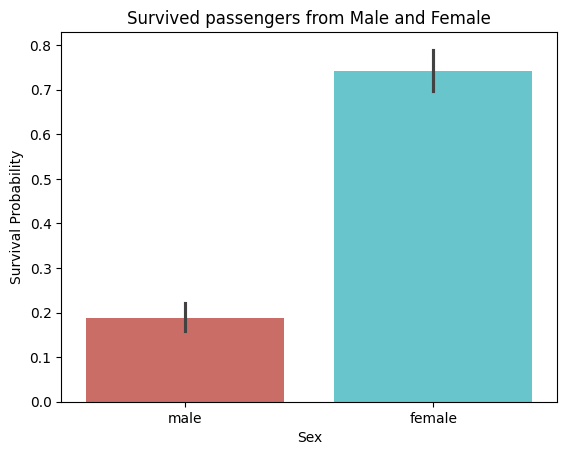

In [24]:
import seaborn as sns
sns.barplot(x='Sex',y='Survived',data=dataset,palette='hls')
plt.title("Survived passengers from Male and Female")
plt.ylabel("Survival Probability")

<ipython-input-22-b5c42892b9a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=dataset,palette='hls')


Text(0.5, 1.0, 'Count of Male and Female Passengers')

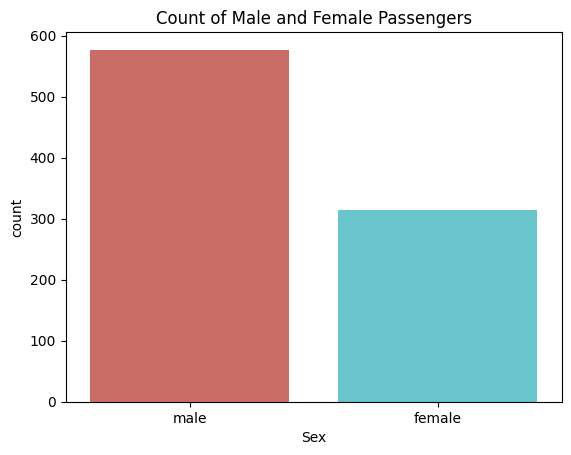

In [22]:
sns.countplot(x='Sex',data=dataset,palette='hls')
plt.title("Count of Male and Female Passengers")

<ipython-input-19-9c2e8fa424c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass',y='Survived',data=dataset,palette='hls')


Text(0, 0.5, 'Survival Probability')

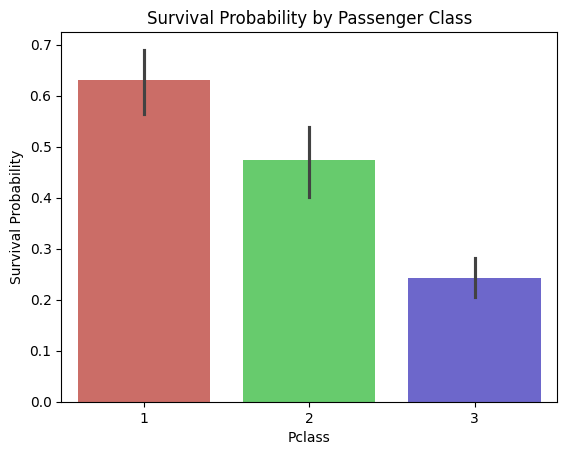

In [19]:
sns.barplot(x='Pclass',y='Survived',data=dataset,palette='hls')
plt.title("Survival Probability by Passenger Class")
plt.ylabel("Survival Probability")

Text(41.99044444444445, 0.5, 'Survival Probability')

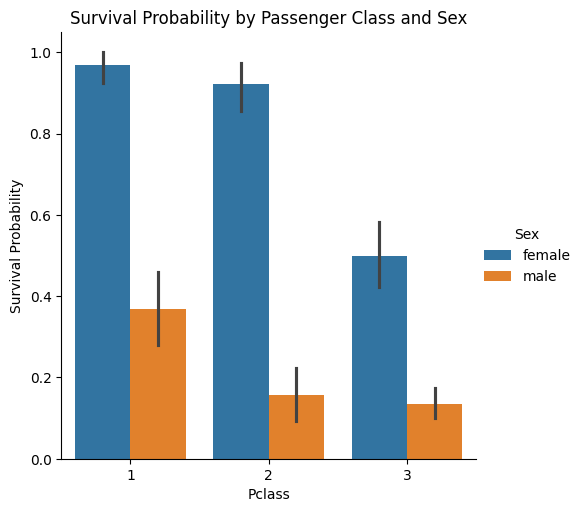

In [21]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=dataset,kind='bar')
plt.title("Survival Probability by Passenger Class and Sex")
plt.ylabel("Survival Probability")

<Axes: >

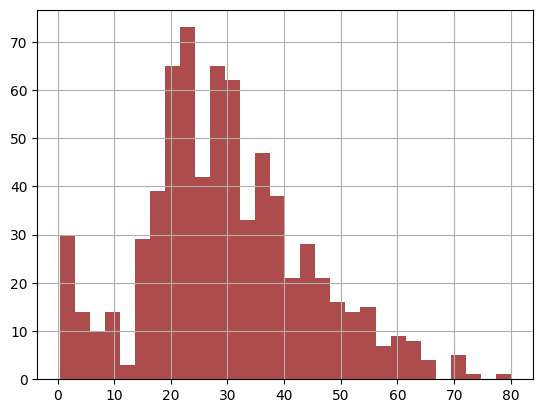

In [25]:
dataset['Age'].hist(bins=30,color='darkred',alpha=0.7)